__Importing the necessary components/libraries__

In [1]:
from IPython.display import Image
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# Seattle vs. Vancouver #

# PART I #

# I.  INTRODUCTION #

## Background ##

__Jan Kowalski, PhD__ is a professor of data science

at Gdańsk University of Technology

https://pg.edu.pl

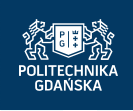

In [2]:
Image("//Users/BoTi/Desktop/PG_logo.png", width=250, height=250)

and 

University of Gdańsk. 

https://ug.edu.pl

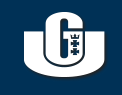

In [3]:
Image("//Users/BoTi/Desktop/UG_logo.png", width=250, height=250)

He specializes in processing of natural languages, although other areas of data processing and data analysis are also of interest to him. Hu published numerous articles and books in his field of interest.

He is well known in the international circles thanks to participation in numerous seminars and other events where he delivers presentations of his extraordinary achievements.

He is 40 years old, single, devoted to his work.

He likes theatre  and baroque music and conteporary art. From time to time he likes to watch a good film.
He also is an acomplished sailor.

Professor Kowalski regularly receives invitations from various foreign universities to come and to teach and run research there.

Recently he received two invitations:

from 

__University of Seattle, Seatle, WA__

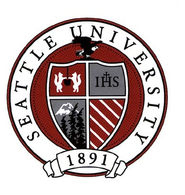

In [4]:
Image("//Users/BoTi/Desktop/SU_logo.png", width=250, height=250)

and

from

__University of British Columbia, Vancouver, BC__

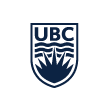

In [5]:
Image("//Users/BoTi/Desktop/UBC_logo.png", width=300, height=300)

# II.  GEOLOCATION OF THE POINTS OF INTEREST #

Both universities are not very far apart

In [6]:
unilocdata = pd.DataFrame({
   'lt':[47.61087,49.25959],
   'ln':[-122.31781,-123.24553],
   'name':['Seattle University','University of British Columbia'],
   }, dtype=str)
unilocdata["lt"] = unilocdata['lt'].astype(float, errors='raise')
unilocdata['ln'] = unilocdata['ln'].astype(float, errors='raise')
unilocdata

,lt,ln,name
0,47.61087,-122.31781,Seattle University
1,49.25959,-123.24553,University of British Columbia


In [7]:
us_can_map= folium.Map(location=[48.36976,-122.29658],zoom_start=8)

for i in range(0,len(unilocdata)):
   folium.Marker(
      location=[unilocdata.iloc[i]['lt'], unilocdata.iloc[i]['ln']],
      popup=unilocdata.iloc[i]['name'],
   ).add_to(us_can_map)
us_can_map

### The map produced by the code above (screenshot) ###

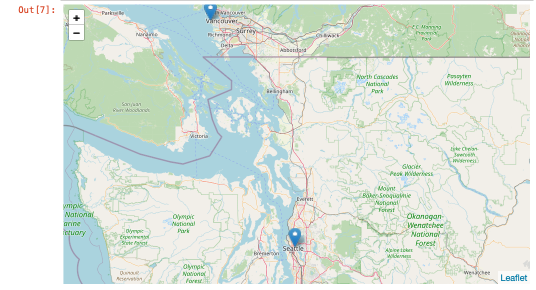

In [42]:
Image("//Users/BoTi/Desktop/us_can_map.png", width=500, height=500)

Both places are very well located in terms of sailing,

Seattle - Puget Sound

Vancouver - Strait of Georgia

Therefore, in this analysis we will concentrate on the availability of other venues interesting to professor Kowalski, i.e.

- concert halls,
- art galleries,
- theatres (dramatic),
- cinemas.

We will also see the __top pics__ from Foursquare to check which city offers more of a social life for a 40-year-old acomplished scientists. This will include top ranked restaurants, museums, parks and sightseeing places. 

# III. VANCOUVER ###

### Data finding and preparation ###

In case of Vancouver we will concentrate on the central part of the city 

In [69]:
address = 'Vancouver, BC'

geolocator = Nominatim(user_agent="vancouver_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver, BC are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver, BC are 49.2608724, -123.1139529.


In [70]:
van_map=folium.Map(location=[location.latitude, location.longitude],zoom_start=12)
van_map

### The map produced by the code above (screenshot) ###

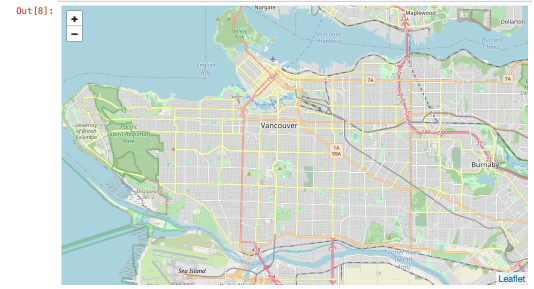

In [43]:
Image("//Users/BoTi/Desktop/vanc1_map.png", width=500, height=500)

# IV. The same with SEATTLE: #

Locating the city and presenting the map

In [65]:
address = 'Seattle, WA'

geolocator = Nominatim(user_agent="seattle_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Seattle, WA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Seattle, WA are 47.6038321, -122.3300624.


In [68]:
stl_map=folium.Map(location=[location.latitude,location.longitude],zoom_start=11)
stl_map

### The map produced by the code above (screenshot) ###

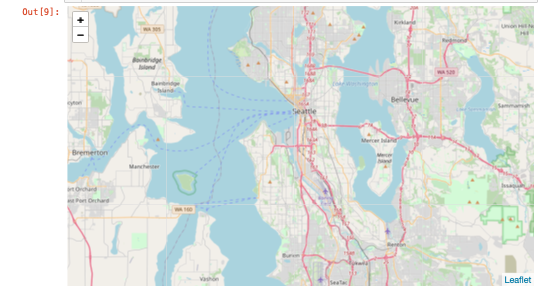

In [44]:
Image("//Users/BoTi/Desktop/stle1_map.png", width=500, height=500)

# IV. Finding the geo data for Vancouver, BC #

initially it was intended to use the posta-codes data base as a source of geo data for Vancouver. However, the analysis of the active codes showed there are 17,556 postal codes under the name of "VANCOUVER"

Therefor the data has been sourced from the publicly accessible city geo-spatial data provided by the city of Vancouver.

The data was downloaded and preprocessed into the csv file.

Only records pertaining the city of Vancouver were chosen (no suburban areas were taken into consideration).


The location data was uploaded to the notebook in a form of the csv file.

Geographical coordinates were changed from 'object'-type to 'float'.

Importing the geolocation data of Vancouver.
The original dataset was downloaded from https://opendata.vancouver.ca/explore/dataset/local-area-boundary/export/?location=12,49.2474,-123.12402&dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6ImxvY2FsLWFyZWEtYm91bmRhcnkiLCJvcHRpb25zIjp7fX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJDT1VOVCIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMjc5QjEifV0sInhBeGlzIjoibmFtZSIsIm1heHBvaW50cyI6NTAsInNvcnQiOiIifV0sInRpbWVzY2FsZSI6IiIsImRpc3BsYXlMZWdlbmQiOnRydWUsImFsaWduTW9udGgiOnRydWV9
to the desktop and then read into the notebook.

In [12]:
van1=pd.read_csv('//Users/BoTi/Desktop/Vancouver-local-area-boundary.csv',delimiter=';')

In [13]:
for i in range(0,len(van1)):
    van1["latitude"] = van1['latitude'].astype(float, errors='raise')
    van1['longitude'] = van1['longitude'].astype(float, errors='raise')
van1.drop(['geo_point_2d'], axis=1, inplace=True)   

In [14]:
van1

,MAPID,Name,latitude,longitude
0,AR,Arbutus-Ridge,49.246805,-123.161669
1,CBD,Downtown,49.280747,-123.116567
2,FAIR,Fairview,49.264540,-123.131049
3,GW,Grandview-Woodland,49.276440,-123.066728
4,HS,Hastings-Sunrise,49.277934,-123.040270
5,MARP,Marpole,49.210207,-123.128382
6,RP,Riley Park,49.244766,-123.103147
7,SHAU,Shaughnessy,49.245681,-123.139760
8,STR,Strathcona,49.278219,-123.088235
9,WE,West End,49.285011,-123.135438


In [15]:
van2_map=folium.Map([49.25207,-123.10365])

for mapid, name, lt,ln in zip(van1['MAPID'], van1['Name'],van1['latitude'],van1['longitude']):
    label = '{}, {}, {}, {}'.format(mapid, name, lt,ln)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lt,ln],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(van2_map)
    
van2_map

### The map produced by the code above (screenshot) ###

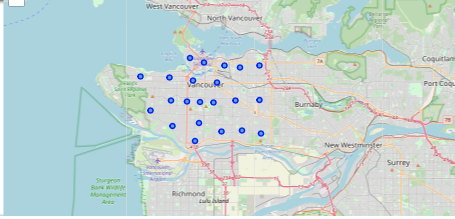

In [45]:
Image("//Users/BoTi/Desktop/vanc2_map.png", width=500, height=500)

In [16]:
van1.dtypes

MAPID         object
Name          object
latitude     float64
longitude    float64
dtype: object

# V. Clustering the city areas of Vancouver #

The purpose of clustering is to choose the most suitable areas from the point of view of Professor Kowalski.

We will choose the clusters sorrounding the University.

In [17]:
k=5
van_clustering = van1.drop(['MAPID','Name'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(van_clustering)
kmeans.labels_
van1.insert(0, 'Cluster Labels', kmeans.labels_)

van1

,Cluster Labels,MAPID,Name,latitude,longitude
0,2,AR,Arbutus-Ridge,49.246805,-123.161669
1,4,CBD,Downtown,49.280747,-123.116567
2,4,FAIR,Fairview,49.264540,-123.131049
3,3,GW,Grandview-Woodland,49.276440,-123.066728
4,3,HS,Hastings-Sunrise,49.277934,-123.040270
5,1,MARP,Marpole,49.210207,-123.128382
6,1,RP,Riley Park,49.244766,-123.103147
7,1,SHAU,Shaughnessy,49.245681,-123.139760
8,3,STR,Strathcona,49.278219,-123.088235
9,4,WE,West End,49.285011,-123.135438


In [61]:
van1.columns

Index(['Cluster Labels', 'MAPID', 'Name', 'latitude', 'longitude'], dtype='object')

In [56]:
van1.dtypes

Cluster Labels      int32
MAPID              object
Name               object
latitude          float64
longitude         float64
dtype: object

In [57]:
van1.shape

(22, 5)

### A map showing the clusters in relation to the University ###

In [18]:

# create map
van_map_clusters = folium.Map(location=[49.25207,-123.10365],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, name, cluster in zip(van1['latitude'], van1['longitude'], van1['Name'], van1['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(van_map_clusters)
       

folium.Marker(
      location=[unilocdata.iloc[1]['lt'], unilocdata.iloc[1]['ln']],
      popup=unilocdata.iloc[1]['name'],
   ).add_to(van_map_clusters)

van_map_clusters


### The map produced by the code above (screenshot) ###

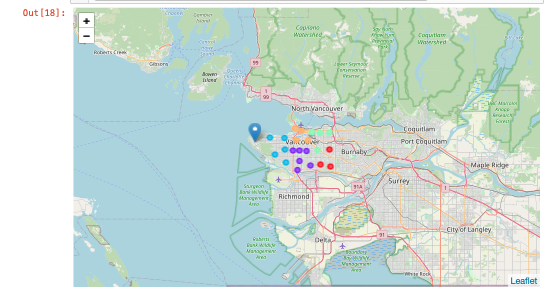

In [46]:
Image("//Users/BoTi/Desktop/vanc_clust_map.png", width=500, height=500)

We will check the presence of the specific venues in clusters nbr 1, 2 & 4

- concert halls
- art galleries
- theatres (dramatic)
- cinemas.

The analysis of the availability of various venues will be made bearing on the data downloaded from Foursquare.

# VI. SEATTLE - the geo data for the city #

From the database of postal codes for the USA nad Canada I filtered the geo data for the zip-codes usingthe following filter:

- state - __WA__
- county -__KING__
- city - __SEATTLE__

In [51]:
stl1=pd.read_csv('//Users/BoTi/Desktop/Seattle-geo_data.csv',delimiter=';')

In [52]:
for i in range(0,len(stl1)):
    stl1["latitude"] = stl1['latitude'].astype(float, errors='raise')
    stl1['longitude'] = stl1['longitude'].astype(float, errors='raise')
stl1

,Zip Code,City,County,State,latitude,longitude
0,98101,SEATTLE,KING,WA,47.611012,-122.333523
1,98102,SEATTLE,KING,WA,47.635749,-122.324362
2,98103,SEATTLE,KING,WA,47.670294,-122.348306
3,98104,SEATTLE,KING,WA,47.602134,-122.328431
4,98105,SEATTLE,KING,WA,47.660400,-122.280530
5,98106,SEATTLE,KING,WA,47.547734,-122.352668
6,98107,SEATTLE,KING,WA,47.664823,-122.383784
7,98108,SEATTLE,KING,WA,47.541083,-122.313312
8,98109,SEATTLE,KING,WA,47.634444,-122.341900
9,98111,SEATTLE,KING,WA,47.606400,-122.330800


In [53]:
address = 'Seattle, WA'

geolocator = Nominatim(user_agent="seattle_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Seattle, WA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Seattle, WA are 47.6038321, -122.3300624.


In [55]:
stl2_map=folium.Map([location.latitude, location.longitude])

for zip_code, city, lt,ln in zip(stl1['Zip Code'], stl1['City'],stl1['latitude'],stl1['longitude']):
    label = '{}, {}, {}, {}'.format(zip_code, city, lt,ln)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lt,ln],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(stl2_map)
    
stl2_map

### The map produced by the code above (screenshot) ###

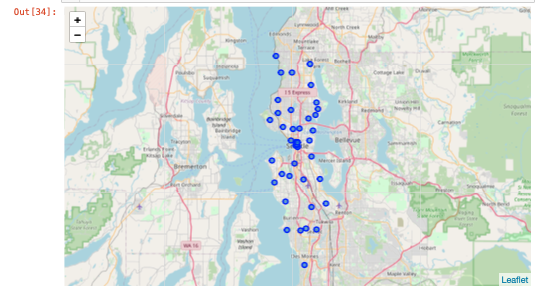

In [48]:
Image("//Users/BoTi/Desktop/stle2_map.png", width=500, height=500)

In [35]:
stl1.dtypes

Zip Code       int64
City          object
County        object
State         object
latitude     float64
longitude    float64
dtype: object

In [36]:
stl1.shape

(59, 6)

# VII. Clustering the areas of Seattle and showing the cluster in relation to the location of teh University #

In [37]:
k=7
stl_clustering = stl1.drop(['Zip Code','City','County','State'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(stl_clustering)
kmeans.labels_
stl1.insert(0, 'Cluster Labels', kmeans.labels_)

stl1

,Cluster Labels,Zip Code,City,County,State,latitude,longitude
0,1,98101,SEATTLE,KING,WA,47.611012,-122.333523
1,1,98102,SEATTLE,KING,WA,47.635749,-122.324362
2,4,98103,SEATTLE,KING,WA,47.670294,-122.348306
3,1,98104,SEATTLE,KING,WA,47.602134,-122.328431
4,6,98105,SEATTLE,KING,WA,47.660400,-122.280530
5,5,98106,SEATTLE,KING,WA,47.547734,-122.352668
6,4,98107,SEATTLE,KING,WA,47.664823,-122.383784
7,3,98108,SEATTLE,KING,WA,47.541083,-122.313312
8,1,98109,SEATTLE,KING,WA,47.634444,-122.341900
9,1,98111,SEATTLE,KING,WA,47.606400,-122.330800


In [62]:
stl1.columns

Index(['Zip Code', 'City', 'County', 'State', 'latitude', 'longitude'], dtype='object')

In [63]:
stl1.dtypes

Zip Code       int64
City          object
County        object
State         object
latitude     float64
longitude    float64
dtype: object

In [64]:
stl1.shape

(59, 6)

In [39]:

# create map
stl_map_clusters = folium.Map(location=[location.latitude,location.longitude],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, name, cluster in zip(stl1['latitude'], stl1['longitude'], stl1['Zip Code'], stl1['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(stl_map_clusters)
       
# add marker for the University
folium.Marker(
      location=[unilocdata.iloc[0]['lt'], unilocdata.iloc[0]['ln']],
      popup=unilocdata.iloc[0]['name'],
   ).add_to(stl_map_clusters)

# show the map
stl_map_clusters


We will check the presence of the specific venues in clusters nbr 1, 4, 5 & 6

- concert halls
- art galleries
- theatres (dramatic)
- cinemas.

### The map produced by the code above (screenshot) ###

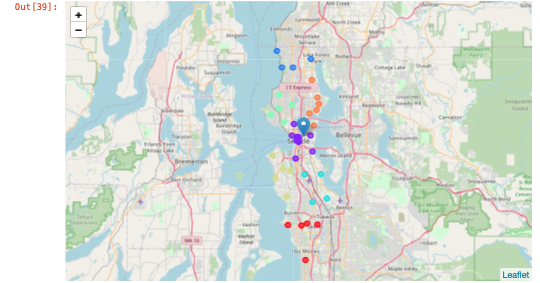

In [50]:
Image("//Users/BoTi/Desktop/stle_clust_map.png", width=500, height=500)

# PART II #

1. In the second part of the project we will import from Forsquare the information about the venues in the selected areas.

2. We will filter the group of the sought-for types of venues.

3. We will compare the number of particular venues